___
# Ciência dos Dados - PROJETO 1

## COLOQUE AQUI SEU NOME
___

## TÍTULO DO SEU PROJETO

___
## Introdução


Desejo analizar a evolução da segurança alimentar, em dois anos de pesquisas, tendo em vista que o foco é relacionar a localização e condições da moradias e a faixa salarial com a seguraça alimentar. 


___
## Análise e Resultados

In [2]:
import pandas as pd
import numpy as np
import os

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [3]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\vitor\Documents\SegundoSemestre\CienciasDosDados\CienciaDosdados2.0


In [4]:
#Se usar o arquivo descompactado
#pd.read_csv('DOM2015.csv',sep=',')

#Se usar o arquivo compactado como está no dropbox púbico
#pd.read_csv('DOM2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')
dados =pd.read_csv('DOM2009csv.zip', compression='zip', header=0, sep=',', quotechar='"')
dados.head()

,Unnamed: 0,V0101,UF,V0102,V0103,V0104,V0105,V0106,V0201,V0202,...,V2136,V2033,V2034,V2035,V2036,V2037,V2038,V2039,V2041,V9992
0,0,2009,11,15,1,8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20120710
1,1,2009,11,15,2,8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20120710
2,2,2009,11,15,3,1,7.0,5.0,1.0,2.0,...,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,20120710
3,3,2009,11,15,4,1,3.0,3.0,1.0,2.0,...,NaN,3.0,3.0,1.0,3.0,3.0,3.0,3.0,3.0,20120710
4,4,2009,11,15,5,1,1.0,1.0,1.0,2.0,...,NaN,3.0,3.0,3.0,1.0,3.0,3.0,3.0,3.0,20120710


In [6]:
# com a escolha de um estado
#dadosPR = dados[dados.UF == 35].loc[:,["UF","V0207","V0201","V4623","V0202","V4105","V4622"]]

# Considerando o brasil inteiro
dadosPR = dados.loc[:,[
    "UF","V0207","V0201","V4623","V0202","V4105","V4622"]]

#Particular improvidado e Coletivo somam menos de 300
dadosPR.V0201= dadosPR.V0201.astype('category')
dadosPR.V0201.cat.categories = ("Particular_permanente","Particular_improvisado","Coletivo") 

dadosPR = dadosPR[pd.notnull(dados.V0201)]

#Valido Manter pois a uma relativa variedade de cada um e posteriormente decidir se é valido para a pergunta
dadosPR.V0207= dadosPR.V0207.astype('category')
dadosPR.V0207.cat.categories = ("Proprio_ja_pago","Proprio_ainda_pagando","Alugado","Cedido_por_empregador","Cedido_de_outra_forma","Outra_condicao")

dadosPR.V0202= dadosPR.V0202.astype('category')
dadosPR.V0202.cat.categories = ("Casa","Apartamento","Cômodo")

#Compreender pRcada item, analizar suas quantidades, significantes ou não, e unificar se necessario

dadosPR.V4105= dadosPR.V4105.astype('category')
dadosPR.V4105.cat.categories = ("URBANA_Cidade_ou_vila_area_urbanizada","e","b","a","RURAL_Aglomerado_rural_isolado_povoado","c","d","RURAL_Zona_rural_exclusive_aglomerado_rural")
#dadosPR[(dadosPR.V4105 == "URBANA_Cidade_ou_vila, área_urbanizada") & (dadosPR.V4105 == "RURAL_Aglomerado_rural,_isolado_povoado") & (dadosPR.V4105 == "RURAL_Zona_rural_exclusive_aglomerado_rural")]


#Decidir se é valido unir os salários
dadosPR.V4622= dadosPR.V4622.astype('category')
dadosPR.V4622.cat.categories = ("Sem_Rendimento","Ate_1/4_salario_minimo","Mais_de_1/4_ate_1/2_salario_minimo","Mais_de_1/2_ate_1_salario_minimo","Mais_de_ 1_ate_2_salarios_minimos","Mais_de_2_ate_3_salarios_minimos","Mais_de_3_ate_5_salarios_minimos","Mais_de_5_salarios_minimos","Sem_declaracao")

#Decidir se deve unificar por tipo de segurança alimenar apenas ou separar também pela existência de menores de 18 ou  maiores de 18
dadosPR.V4623= dadosPR.V4623.astype('category')
dadosPR.V4623.cat.categories = ("Tem_morador_menor_de_18_anos_e_tem_seguranca_alimentar","Tem_morador_menor_de_18_anos_e_inseguranca_alimentar_leve","Tem_morador_menor_de_18_anos_e_inseguranca_alimentar_moderada","Tem_morador_menor_de_18_anos_e_inseguranca_alimentar_grave","Nao_tem_morador_menor_de_18_anos_e_tem_seguranca_alimentar","Nao_tem_morador_menor_de_18_anos_e_inseguranca_alimentar_leve","Nao_tem_morador_menor_de_18_anos_e_inseguranca_alimentar_moderada","Nao_tem_morador_menor_de_18_anos_e_inseguranca_alimentar_grave")



dadosPR.columns = ["Estado","Condicao_de_ocupacao_do_domicílio","Especie_do_Domicilio","Seguranca_Alimentar","Tipo_do_Domicilio","Codigo_de_Situacao_Censitaria","Faixa_do_rendimento_mensal_domiciliar_per_capita"]



#dadosPR[(dadosPR.Código_de_Situacao_Censitaria == "URBANA_Cidade_ou_vila, área_urbanizada") & (dadosPR.Código_de_Situacao_Censitaria == "RURAL_Aglomerado_rural,_isolado_povoado") & (dadosPR.Código_de_Situacao_Censitaria == "RURAL_Zona_rural_exclusive_aglomerado_rural")]
dadosPR2 = dadosPR[dados.UF == 17]
dadosPR3 = dadosPR2[(dadosPR.Codigo_de_Situacao_Censitaria == "URBANA_Cidade_ou_vila_area_urbanizada") | (dadosPR.Codigo_de_Situacao_Censitaria == "RURAL_Aglomerado_rural_isolado_povoado")|(dadosPR.Codigo_de_Situacao_Censitaria == "RURAL_Zona_rural_exclusive_aglomerado_rural")]
dadosPR3

#dadosPR3.to_csv("dadosRESUMO.csv")
#dados_f =pd.read_csv('dadosRESUMO.csv', sep=',')
#dados_f.dtypes
#dados_f

C:\Users\vitor\Documents\Anaconda-Phython\lib\site-packages\ipykernel\__main__.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\vitor\Documents\Anaconda-Phython\lib\site-packages\ipykernel\__main__.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,Estado,Condicao_de_ocupacao_do_domicílio,Especie_do_Domicilio,Seguranca_Alimentar,Tipo_do_Domicilio,Codigo_de_Situacao_Censitaria,Faixa_do_rendimento_mensal_domiciliar_per_capita
16232,17,Proprio_ja_pago,Particular_permanente,Tem_morador_menor_de_18_anos_e_tem_seguranca_a...,Casa,URBANA_Cidade_ou_vila_area_urbanizada,Mais_de_1/2_ate_1_salario_minimo
16233,17,Proprio_ja_pago,Particular_permanente,Nao_tem_morador_menor_de_18_anos_e_inseguranca...,Casa,URBANA_Cidade_ou_vila_area_urbanizada,Mais_de_ 1_ate_2_salarios_minimos
16234,17,Proprio_ja_pago,Particular_permanente,Nao_tem_morador_menor_de_18_anos_e_tem_seguran...,Casa,URBANA_Cidade_ou_vila_area_urbanizada,Mais_de_ 1_ate_2_salarios_minimos
16235,17,Cedido_de_outra_forma,Particular_permanente,Tem_morador_menor_de_18_anos_e_tem_seguranca_a...,Casa,URBANA_Cidade_ou_vila_area_urbanizada,Ate_1/4_salario_minimo
16237,17,Alugado,Particular_permanente,Tem_morador_menor_de_18_anos_e_tem_seguranca_a...,Casa,URBANA_Cidade_ou_vila_area_urbanizada,Mais_de_2_ate_3_salarios_minimos
16238,17,Alugado,Particular_permanente,Tem_morador_menor_de_18_anos_e_tem_seguranca_a...,Casa,URBANA_Cidade_ou_vila_area_urbanizada,Mais_de_ 1_ate_2_salarios_minimos
16240,17,Proprio_ja_pago,Particular_permanente,Nao_tem_morador_menor_de_18_anos_e_inseguranca...,Casa,URBANA_Cidade_ou_vila_area_urbanizada,Mais_de_1/2_ate_1_salario_minimo
16241,17,Proprio_ja_pago,Particular_permanente,Nao_tem_morador_menor_de_18_anos_e_tem_seguran...,Casa,URBANA_Cidade_ou_vila_area_urbanizada,Mais_de_1/2_ate_1_salario_minimo
16242,17,Proprio_ja_pago,Particular_permanente,Nao_tem_morador_menor_de_18_anos_e_tem_seguran...,Casa,URBANA_Cidade_ou_vila_area_urbanizada,Mais_de_3_ate_5_salarios_minimos
16243,17,Cedido_de_outra_forma,Particular_permanente,Tem_morador_menor_de_18_anos_e_inseguranca_ali...,Casa,URBANA_Cidade_ou_vila_area_urbanizada,Mais_de_1/4_ate_1/2_salario_minimo


In [7]:
dadosPR3.Codigo_de_Situacao_Censitaria.value_counts()
#dadosPR.V4105.value_counts()
# correções concluidadas com sucesso. Foi possivel escolher apenas as linhas mais relevantes


URBANA_Cidade_ou_vila_area_urbanizada          1273
RURAL_Zona_rural_exclusive_aglomerado_rural     319
RURAL_Aglomerado_rural_isolado_povoado          105
d                                                 0
c                                                 0
a                                                 0
b                                                 0
e                                                 0
Name: Codigo_de_Situacao_Censitaria, dtype: int64

In [8]:
ct = pd.crosstab(dadosPR3.Codigo_de_Situacao_Censitaria, dadosPR3.Seguranca_Alimentar)
ct

Seguranca_Alimentar,Tem_morador_menor_de_18_anos_e_tem_seguranca_alimentar,Tem_morador_menor_de_18_anos_e_inseguranca_alimentar_leve,Tem_morador_menor_de_18_anos_e_inseguranca_alimentar_moderada,Tem_morador_menor_de_18_anos_e_inseguranca_alimentar_grave,Nao_tem_morador_menor_de_18_anos_e_tem_seguranca_alimentar,Nao_tem_morador_menor_de_18_anos_e_inseguranca_alimentar_leve,Nao_tem_morador_menor_de_18_anos_e_inseguranca_alimentar_moderada,Nao_tem_morador_menor_de_18_anos_e_inseguranca_alimentar_grave
Codigo_de_Situacao_Censitaria,,,,,,,,
URBANA_Cidade_ou_vila_area_urbanizada,425,248,97,29,325,80,39,30
e,0,0,0,0,0,0,0,0
b,0,0,0,0,0,0,0,0
a,0,0,0,0,0,0,0,0
RURAL_Aglomerado_rural_isolado_povoado,18,30,11,3,18,13,9,3
c,0,0,0,0,0,0,0,0
d,0,0,0,0,0,0,0,0
RURAL_Zona_rural_exclusive_aglomerado_rural,69,56,24,17,107,23,14,9


In [9]:
Graf1 = pd.crosstab(dadosPR3.Condicao_de_ocupacao_do_domicílio, dadosPR3.Seguranca_Alimentar)
Graf1

Seguranca_Alimentar,Tem_morador_menor_de_18_anos_e_tem_seguranca_alimentar,Tem_morador_menor_de_18_anos_e_inseguranca_alimentar_leve,Tem_morador_menor_de_18_anos_e_inseguranca_alimentar_moderada,Tem_morador_menor_de_18_anos_e_inseguranca_alimentar_grave,Nao_tem_morador_menor_de_18_anos_e_tem_seguranca_alimentar,Nao_tem_morador_menor_de_18_anos_e_inseguranca_alimentar_leve,Nao_tem_morador_menor_de_18_anos_e_inseguranca_alimentar_moderada,Nao_tem_morador_menor_de_18_anos_e_inseguranca_alimentar_grave
Condicao_de_ocupacao_do_domicílio,,,,,,,,
Proprio_ja_pago,345,235,82,39,321,83,43,31
Proprio_ainda_pagando,12,6,2,0,12,2,4,0
Alugado,99,48,26,6,68,23,7,3
Cedido_por_empregador,23,14,5,0,29,3,4,3
Cedido_de_outra_forma,31,30,16,4,20,5,4,5
Outra_condicao,1,0,1,0,0,0,0,0


In [10]:
#Unico modo que consegui para utilizar uma variavel do crosstab e plotar um graf de frequencia relativa considerando apenas os elementos do proprio ja pago e diferentemente de antes que a freq relativa era referente a todas as variaveis da condicao de ocup
dadosPR4 = dadosPR3[dadosPR3.Condicao_de_ocupacao_do_domicílio=="Proprio_ja_pago"]
dadosPR5 = dadosPR3[dadosPR3.Condicao_de_ocupacao_do_domicílio=="Proprio_ainda_pagando"]
dadosPR6 = dadosPR3[dadosPR3.Condicao_de_ocupacao_do_domicílio=="Alugado"]

#Criando os crosstab  para cada variavel a cima, para criar um grafico repectivo a cada uma
Graf10 = pd.crosstab(dadosPR4.Condicao_de_ocupacao_do_domicílio, dadosPR4.Seguranca_Alimentar, normalize=True)*100
Graf11 = pd.crosstab(dadosPR5.Condicao_de_ocupacao_do_domicílio, dadosPR5.Seguranca_Alimentar, normalize=True)*100
Graf12 = pd.crosstab(dadosPR6.Condicao_de_ocupacao_do_domicílio, dadosPR6.Seguranca_Alimentar, normalize=True)*100


Graf10



Seguranca_Alimentar,Tem_morador_menor_de_18_anos_e_tem_seguranca_alimentar,Tem_morador_menor_de_18_anos_e_inseguranca_alimentar_leve,Tem_morador_menor_de_18_anos_e_inseguranca_alimentar_moderada,Tem_morador_menor_de_18_anos_e_inseguranca_alimentar_grave,Nao_tem_morador_menor_de_18_anos_e_tem_seguranca_alimentar,Nao_tem_morador_menor_de_18_anos_e_inseguranca_alimentar_leve,Nao_tem_morador_menor_de_18_anos_e_inseguranca_alimentar_moderada,Nao_tem_morador_menor_de_18_anos_e_inseguranca_alimentar_grave
Condicao_de_ocupacao_do_domicílio,,,,,,,,
Proprio_ja_pago,29.262087,19.932146,6.955047,3.307888,27.226463,7.039864,3.647159,2.629347
Proprio_ainda_pagando,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Alugado,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Cedido_por_empregador,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Cedido_de_outra_forma,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Outra_condicao,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


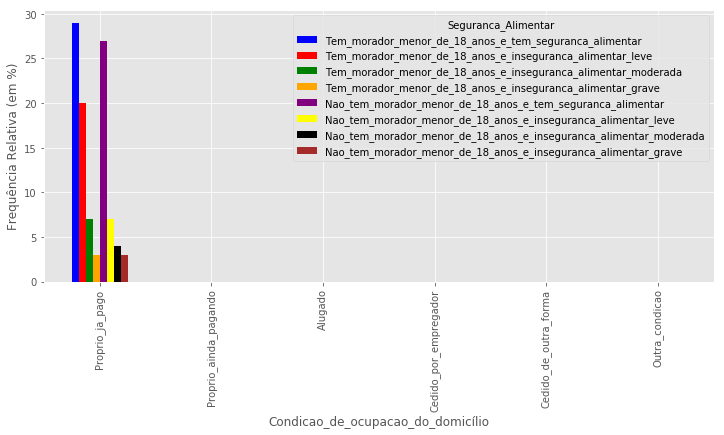

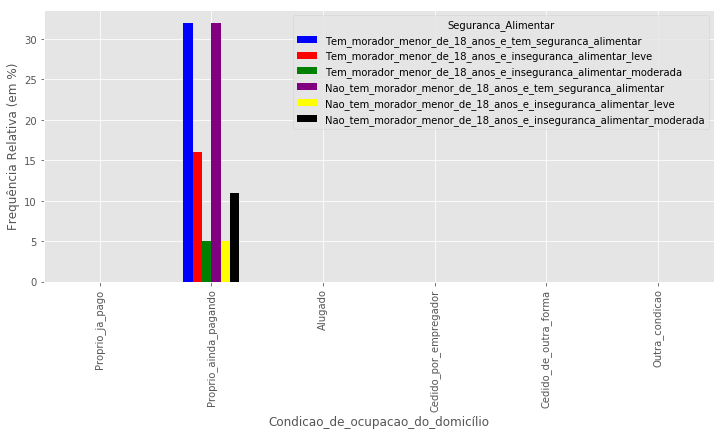

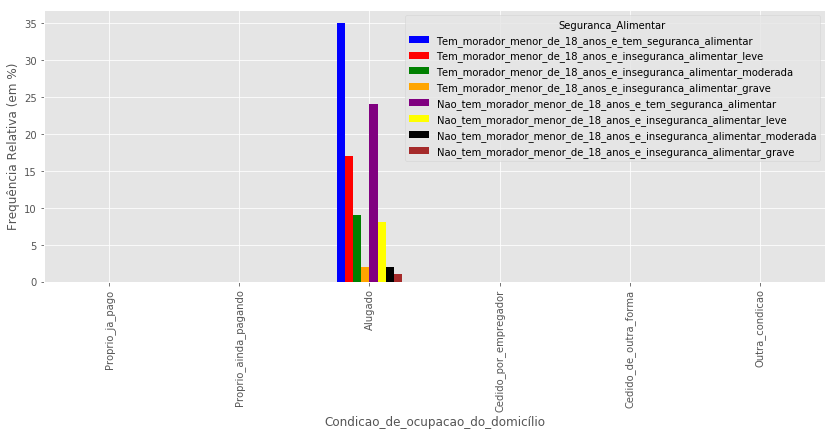

In [11]:
#Falta tirar as conclusões, entretanto os gráficos estão quase prontos(Acredito)

Graf2 = (Graf10/Graf10.sum().sum()*100).round(decimals=0)
Graf2.plot(kind='bar', color=('blue', 'red', 'green','orange', 'purple', 'yellow','black','brown'),  figsize=(12,5))
plt.ylabel('Frequência Relativa (em %)')


#retirado a cor laranja para não haver diferença das mesma na hora de comparar um com o outro
Graf3 = (Graf11/Graf11.sum().sum()*100).round(decimals=0)
Graf3.plot(kind='bar', color=('blue', 'red', 'green','purple', 'yellow','black','brown'),  figsize=(12,5))
plt.ylabel('Frequência Relativa (em %)')

Graf4 = (Graf12/Graf12.sum().sum()*100).round(decimals=0)
Graf4.plot(kind='bar', color=('blue', 'red', 'green','orange', 'purple', 'yellow','black','brown'),  figsize=(14,5))
plt.ylabel('Frequência Relativa (em %)')

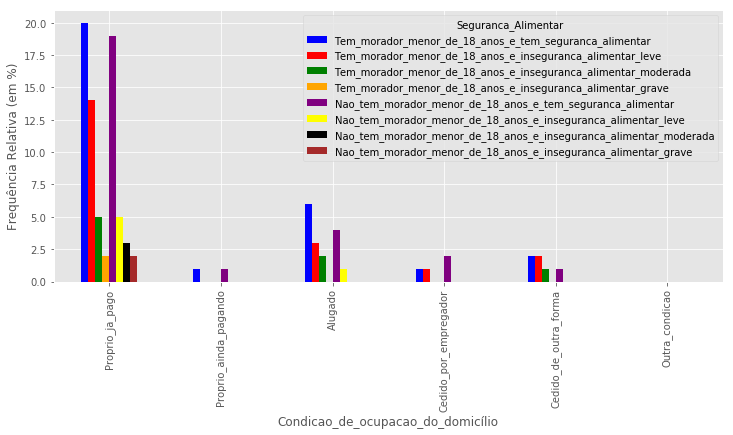

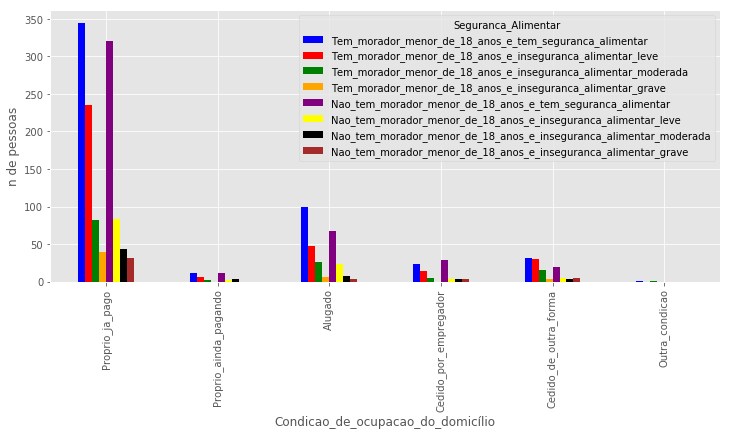

In [105]:
#Diferenças encontradas principalmente ao compararmos as frequencias rellativas com os graficos de cima, pois as de baixo
#dividem pela soma de todos os Propios ja pagos + alugados + outros ...



Graf2 = pd.crosstab(dadosPR3.Condicao_de_ocupacao_do_domicílio, dadosPR3.Seguranca_Alimentar)
Graf2 = (Graf2/Graf2.sum().sum()*100).round(decimals=0)
Graf2.plot(kind='bar', color=('blue', 'red', 'green','orange', 'purple', 'yellow','black','brown'),  figsize=(12,5))
plt.ylabel('Frequência Relativa (em %)')


Graf2 = pd.crosstab(dadosPR3.Condicao_de_ocupacao_do_domicílio, dadosPR3.Seguranca_Alimentar)
#Graf2 = (Graf2/Graf2.sum().sum()*100).round(decimals=0)
Graf2.plot(kind='bar', color=('blue', 'red', 'green','orange', 'purple', 'yellow','black','brown'),  figsize=(12,5))
plt.ylabel('n de pessoas')

#ct2 = pd.crosstab(dados.EDUCACAO, dados.DEFAULT)
#ct2 = (ct2/ct2.sum().sum()*100).round(decimals=0)
#ct2.plot(kind='bar', color=('yellow', 'salmon'))
#plt.ylabel('Frequência Relativa (em %)')

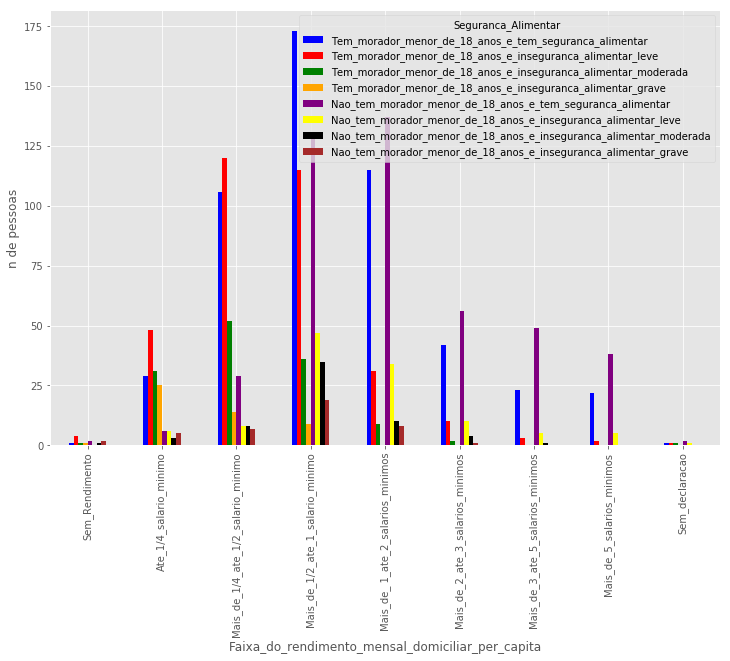

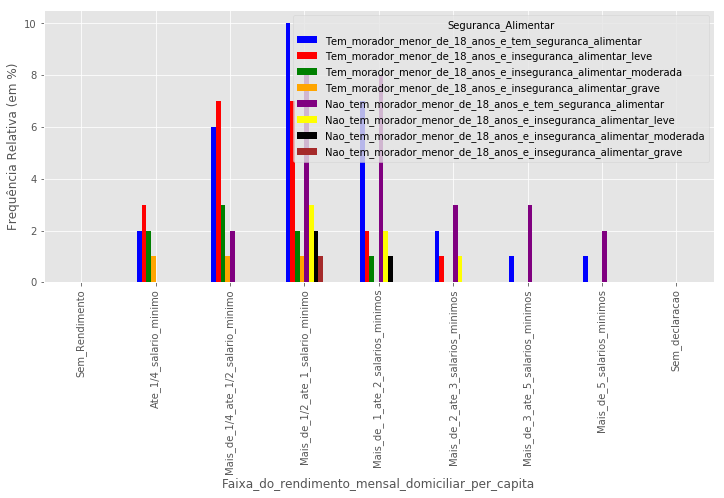

In [106]:
#Diferenças encontradas principalmente ao compararmos as frequencias rellativas com os graficos de cima, pois as de baixo
#dividem pela soma de todos os Propios ja pagos + alugados + outros ...

ct1 = pd.crosstab(dadosPR3.Faixa_do_rendimento_mensal_domiciliar_per_capita, dadosPR3.Seguranca_Alimentar)
ct1.plot(kind='bar', color=('blue', 'red', 'green','orange', 'purple', 'yellow','black','brown'),  figsize=(12,8))
plt.ylabel('n de pessoas')



GF = pd.crosstab(dadosPR3.Faixa_do_rendimento_mensal_domiciliar_per_capita, dadosPR3.Seguranca_Alimentar)
GF = (GF/GF.sum().sum()*100).round(decimals=0)
GF.plot(kind='bar', color=('blue', 'red', 'green','orange', 'purple', 'yellow','black','brown'),  figsize=(12,5))
plt.ylabel('Frequência Relativa (em %)')

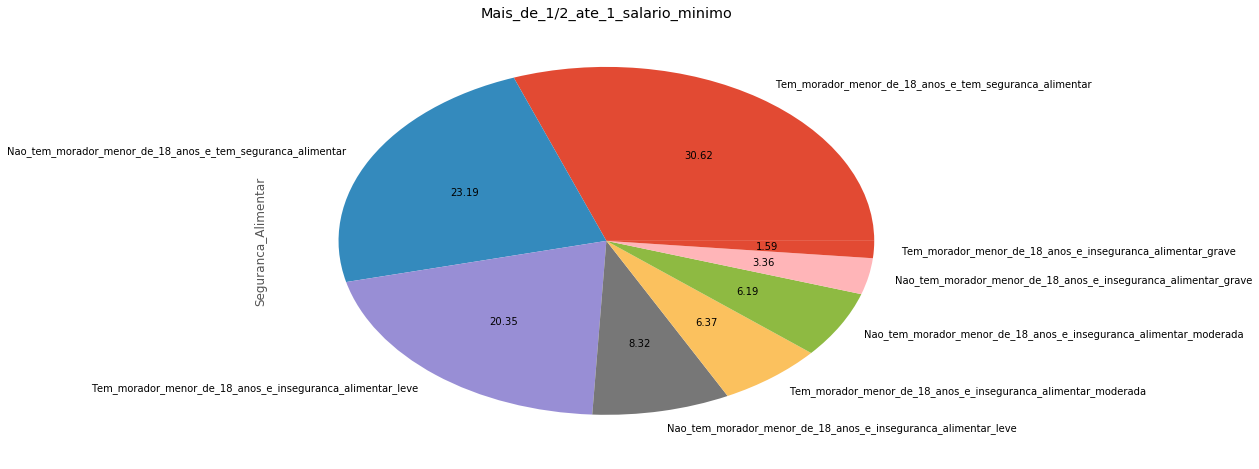

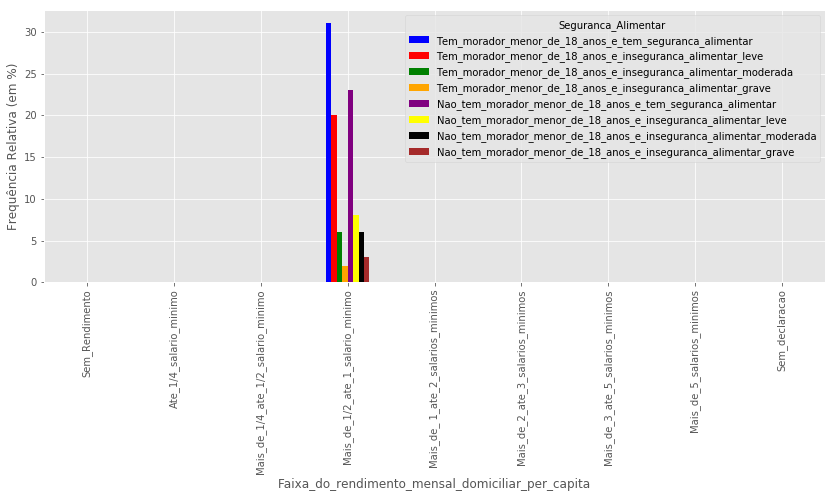

In [212]:
#Formulas corretas tanto para os gráfico de pizza quantos os de barra.Porém ainda falta as conclusões
#e algum modo de organizar tantos gráficos ou encontrar algum jeito de uni-los


ct1 = pd.crosstab(dadosPR10.Faixa_do_rendimento_mensal_domiciliar_per_capita, dadosPR3.Seguranca_Alimentar,normalize=True)*100

dadosPR7 = dadosPR3[dadosPR3.Faixa_do_rendimento_mensal_domiciliar_per_capita=="Sem_Rendimento"]
dadosPR8 = dadosPR3[dadosPR3.Faixa_do_rendimento_mensal_domiciliar_per_capita=="Ate_1/4_salario_minimo"]
dadosPR9 = dadosPR3[dadosPR3.Faixa_do_rendimento_mensal_domiciliar_per_capita=="Mais_de_1/4_ate_1/2_salario_minimo"]
dadosPR10 = dadosPR3[dadosPR3.Faixa_do_rendimento_mensal_domiciliar_per_capita=="Mais_de_1/2_ate_1_salario_minimo"]
dadosPR11 = dadosPR3[dadosPR3.Faixa_do_rendimento_mensal_domiciliar_per_capita=="Mais_de_1_ate_2_salarios_minimos"]
dadosPR12 = dadosPR3[dadosPR3.Faixa_do_rendimento_mensal_domiciliar_per_capita=="Mais_de_2_ate_3_salarios_minimos"]
dadosPR13 = dadosPR3[dadosPR3.Faixa_do_rendimento_mensal_domiciliar_per_capita=="Mais_de_3_ate_5_salarios_minimos"]
dadosPR14 = dadosPR3[dadosPR3.Faixa_do_rendimento_mensal_domiciliar_per_capita=="Mais_de_5_salario_minimo"]

#dadosPR15 = dadosPR3.Condicao_de_ocupacao_do_domicílio.value_counts()
#dadosPR15.plot(kind='pie', colors=('yellow', 'salmon', 'blue', 'red', 'green'), autopct="%.2f", legend=False, subplots=False)


GR15 = dadosPR3.Seguranca_Alimentar[dadosPR3.Faixa_do_rendimento_mensal_domiciliar_per_capita=='Mais_de_1/2_ate_1_salario_minimo'].value_counts()
plt.title('Mais_de_1/2_ate_1_salario_minimo')
GR15.plot(kind='pie', autopct="%.2f",legend=False, figsize=(12,8))

#print(ct1)

#GR14 = dadosPR3.Faixa_do_rendimento_mensal_domiciliar_per_capita[dadosPR3.Seguranca_Alimentar =='Tem_morador_menor_de_18_anos_e_tem_seguranca_alimentar'].value_counts()
#plt.title('<18 e Segurança Alimentar')
#GR14.plot(kind='pie', autopct="%.2f",legend=False, figsize=(12,8))

Graf15 = (ct1/ct1.sum().sum()*100).round(decimals=0)
Graf15.plot(kind='bar', color=('blue', 'red', 'green','orange', 'purple', 'yellow','black','brown'),  figsize=(14,5))
plt.ylabel('Frequência Relativa (em %)')

 

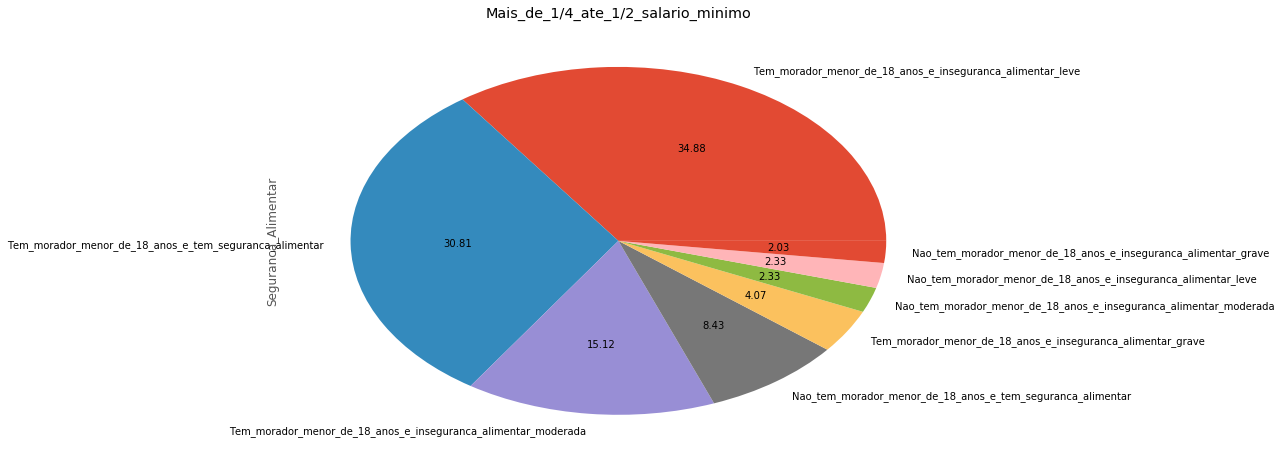

In [211]:
#gráfico em forma de pizza, porém até o momento so será possivel comparar os dados de faixa de rend/ seg alimentar 
#com gráficos respectivos para cada variável de faixa de rendimento

ct9 = pd.crosstab(dadosPR9.Faixa_do_rendimento_mensal_domiciliar_per_capita, dadosPR3.Seguranca_Alimentar,normalize=True)*100
#print(ct9)


GR16 = dadosPR3.Seguranca_Alimentar[dadosPR3.Faixa_do_rendimento_mensal_domiciliar_per_capita=='Mais_de_1/4_ate_1/2_salario_minimo'].value_counts()
plt.title('Mais_de_1/4_ate_1/2_salario_minimo')
GR16.plot(kind='pie', autopct="%.2f",legend=False, figsize=(12,8))

In [179]:
# isolando as variáveis para poder montar um gráfico respectivo para cada uma
dadosPR20 = dadosPR3[dadosPR3.Codigo_de_Situacao_Censitaria=="URBANA_Cidade_ou_vila_area_urbanizada"]
dadosPR21 =  dadosPR3[dadosPR3.Codigo_de_Situacao_Censitaria=="RURAL_Aglomerado_rural_isolado_povoado"]
dadosPR22 = dadosPR3[dadosPR3.Codigo_de_Situacao_Censitaria=="RURAL_Zona_rural_exclusive_aglomerado_rural"]


PR20 = pd.crosstab(dadosPR20.Codigo_de_Situacao_Censitaria, dadosPR3.Seguranca_Alimentar)
PR21 = pd.crosstab(dadosPR21.Codigo_de_Situacao_Censitaria, dadosPR3.Seguranca_Alimentar)
PR22 = pd.crosstab(dadosPR22.Codigo_de_Situacao_Censitaria, dadosPR3.Seguranca_Alimentar)

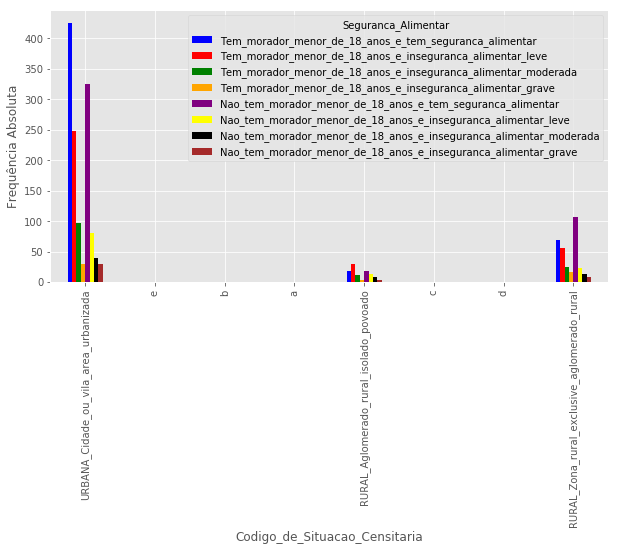

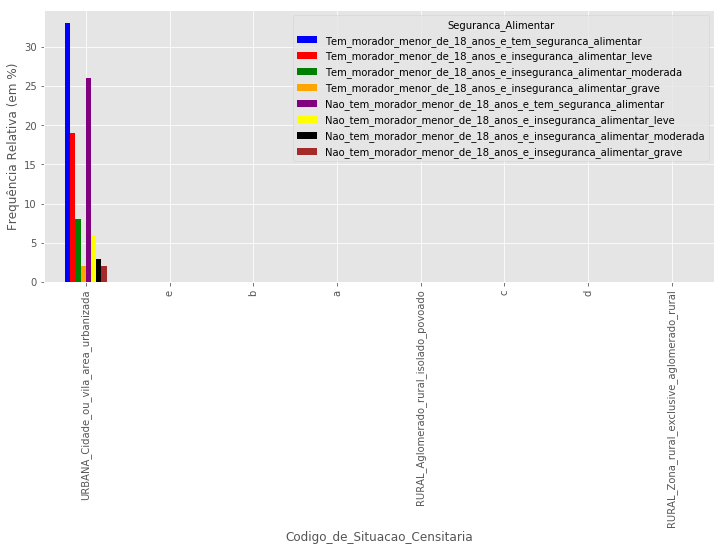

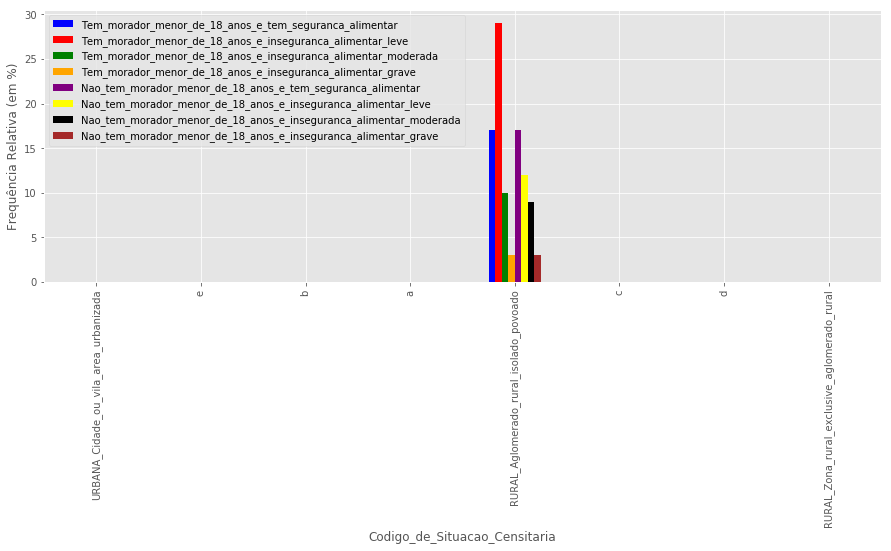

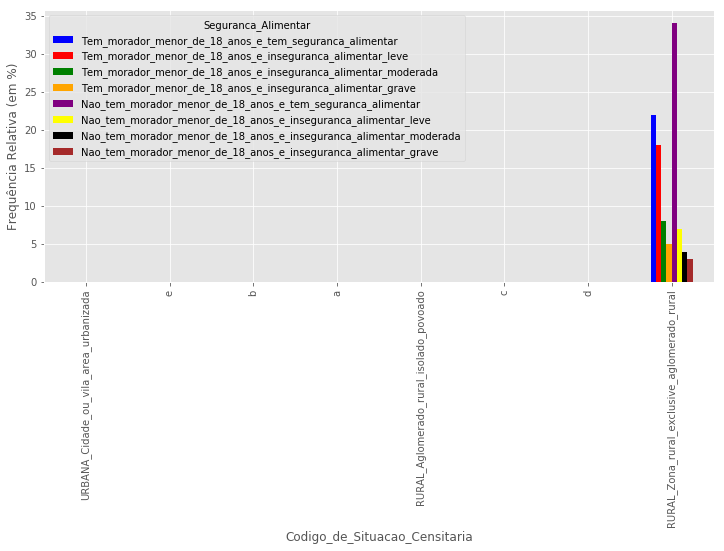

In [193]:


ct4 = pd.crosstab(dadosPR3.Codigo_de_Situacao_Censitaria, dadosPR3.Seguranca_Alimentar)
ct4.plot(kind='bar', color=('blue', 'red', 'green','orange', 'purple', 'yellow','black','brown'),  figsize=(10,5))
plt.ylabel('Frequência Absoluta')

#Cens_Segu = pd.crosstab(dadosPR3.Código_de_Situacao_Censitaria, dadosPR3.Seguranca_Alimentar)
#Cens_Segu.plot(kind='bar', color=('blue', 'red', 'green','orange', 'purple', 'yellow','black','brown'),  figsize=(8,5))
#plt.ylabel('Frequência Absoluta')

GTX = (PR20/PR20.sum().sum()*100).round(decimals=0)
GTX.plot(kind='bar', color=('blue', 'red', 'green','orange', 'purple', 'yellow','black','brown'),  figsize=(12,5))
plt.ylabel('Frequência Relativa (em %)')

GTX2 = (PR21/PR21.sum().sum()*100).round(decimals=0)
GTX2.plot(kind='bar', color=('blue', 'red', 'green','orange', 'purple', 'yellow','black','brown'),  figsize=(15,5))
plt.legend(loc='upper left', prop={'size':10})
plt.ylabel('Frequência Relativa (em %)')

GTX3 = (PR22/PR22.sum().sum()*100).round(decimals=0)
GTX3.plot(kind='bar', color=('blue', 'red', 'green','orange', 'purple', 'yellow','black','brown'),  figsize=(12,5))
plt.ylabel('Frequência Relativa (em %)')




In [213]:
#Tentativa fracassada de unir todos os gráficos em apenas um

#Ignorar esta parte
#GTX.plot(kind='bar', color=('blue', 'red', 'green','orange', 'purple', 'yellow','black','brown'),  figsize=(12,5))
#GTX2.plot(kind='bar', color=('blue', 'red', 'green','orange', 'purple', 'yellow','black','brown'),  figsize=(12,5))
#GTX3.plot(kind='bar', color=('blue', 'red', 'green','orange', 'purple', 'yellow','black','brown'),  figsize=(12,5))

#plt.ylabel('Frequência Relativa (em %)')
#plt.show()

In [90]:
ct2 = pd.crosstab(dadosPR3.Codigo_de_Situacao_Censitaria, dadosPR3.Condicao_de_ocupacao_do_domicílio)#normalize=True)*100
#porcentagem perante ao total, talvez seja mais valido usar frequência relativa
ct2

Condicao_de_ocupacao_do_domicílio,Proprio_ja_pago,Proprio_ainda_pagando,Alugado,Cedido_por_empregador,Cedido_de_outra_forma,Outra_condicao
Codigo_de_Situacao_Censitaria,,,,,,
URBANA_Cidade_ou_vila_area_urbanizada,864,33,277,8,87,2
e,0,0,0,0,0,0
b,0,0,0,0,0,0
a,0,0,0,0,0,0
RURAL_Aglomerado_rural_isolado_povoado,92,2,1,0,10,0
c,0,0,0,0,0,0
d,0,0,0,0,0,0
RURAL_Zona_rural_exclusive_aglomerado_rural,223,3,2,73,18,0


___
## Conclusão 

Descreva aqui suas conclusões!